# Togo-Dapaong Solar Data EDA
**Objective**: Clean and analyze solar data

In [12]:
# Imports (Proactivity)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

# Load data (Data Loading)
df = pd.read_csv('C:/Users/user/Desktop/solar-challenge-week1/data/togo.csv', parse_dates=['Timestamp'])
print(f"Initial shape: {df.shape}")
df.head()

Initial shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [13]:

# Missing values 
missing = pd.DataFrame({
    'Missing': df.isna().sum(),
    'Percentage': df.isna().mean() * 100
})
display(missing[missing['Percentage'] > 5])  # Highlight critical columns

# Basic stats 
display(df.describe(include=[np.number]))

,Missing,Percentage
Comments,525600,100.0


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Outlier rows: 9251/525600


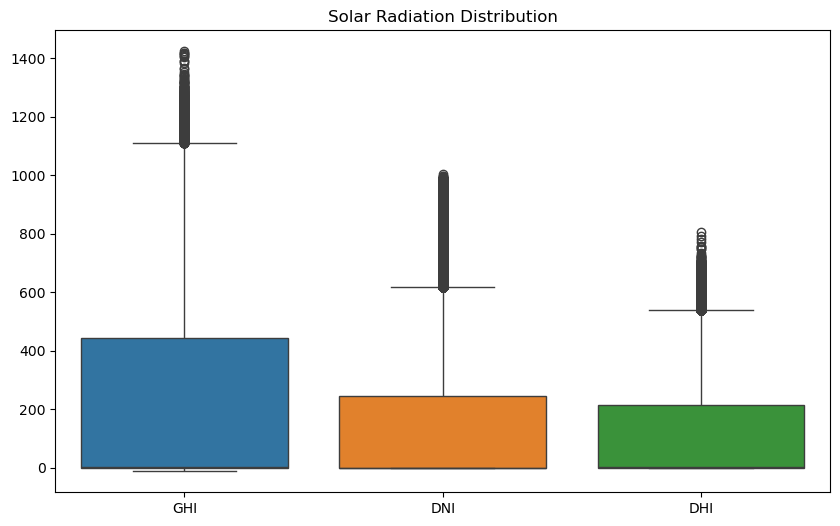

In [14]:
# Z-score analysis (|Z|>3)
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols_to_check].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"Outlier rows: {outliers.sum()}/{len(df)}")

# Visualize outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title("Solar Radiation Distribution")
plt.show()

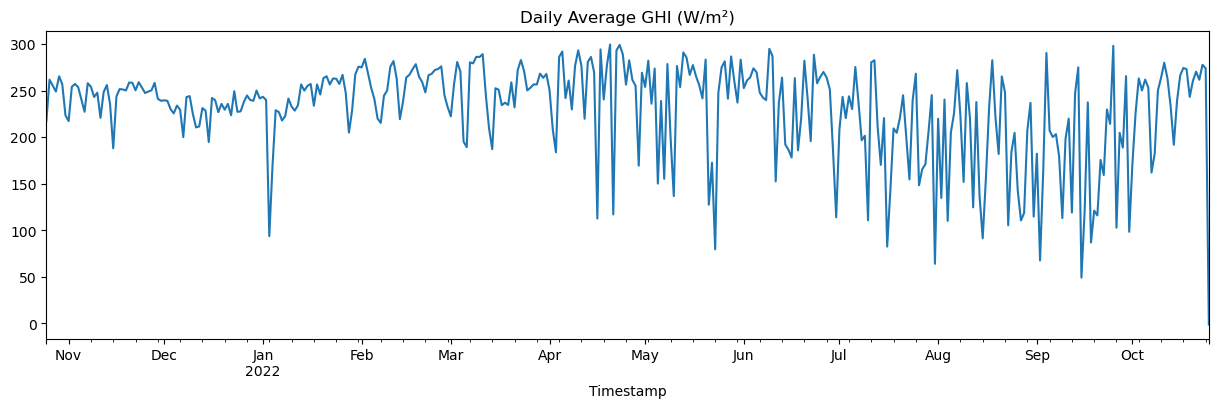

In [15]:
# Set timestamp as index
df.set_index('Timestamp', inplace=True)

# Daily patterns
df['GHI'].resample('D').mean().plot(
    title='Daily Average GHI (W/m²)',
    figsize=(15,4))
plt.show()

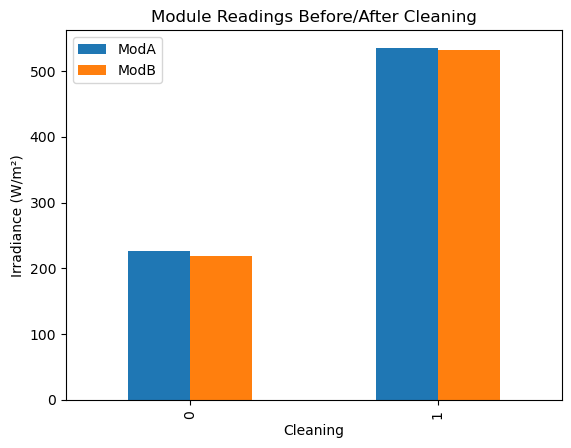

In [16]:
# Compare sensor readings 
clean_stats = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
clean_stats.plot(kind='bar', title='Module Readings Before/After Cleaning')
plt.ylabel('Irradiance (W/m²)')
plt.show()

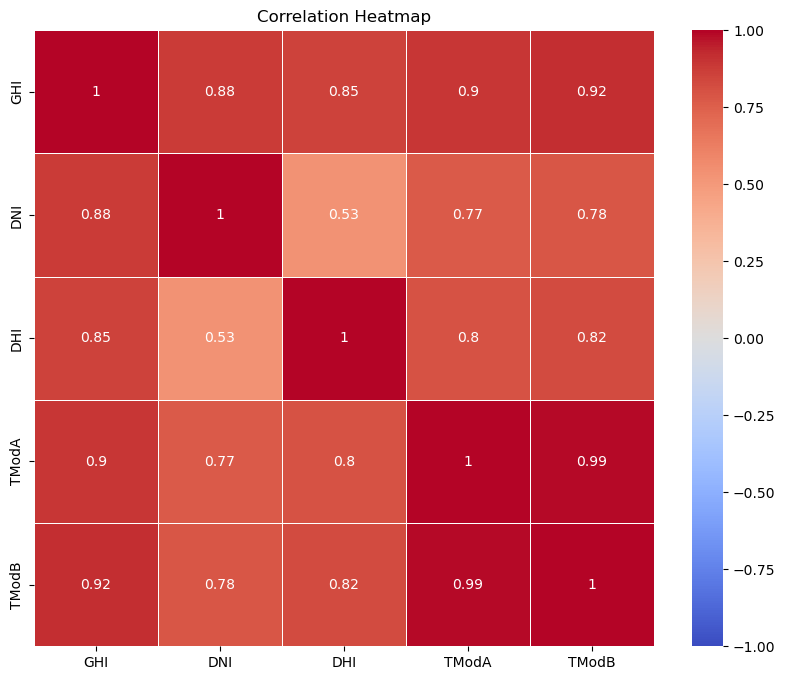

In [17]:
# Heatmap of correlations
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(10,8))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

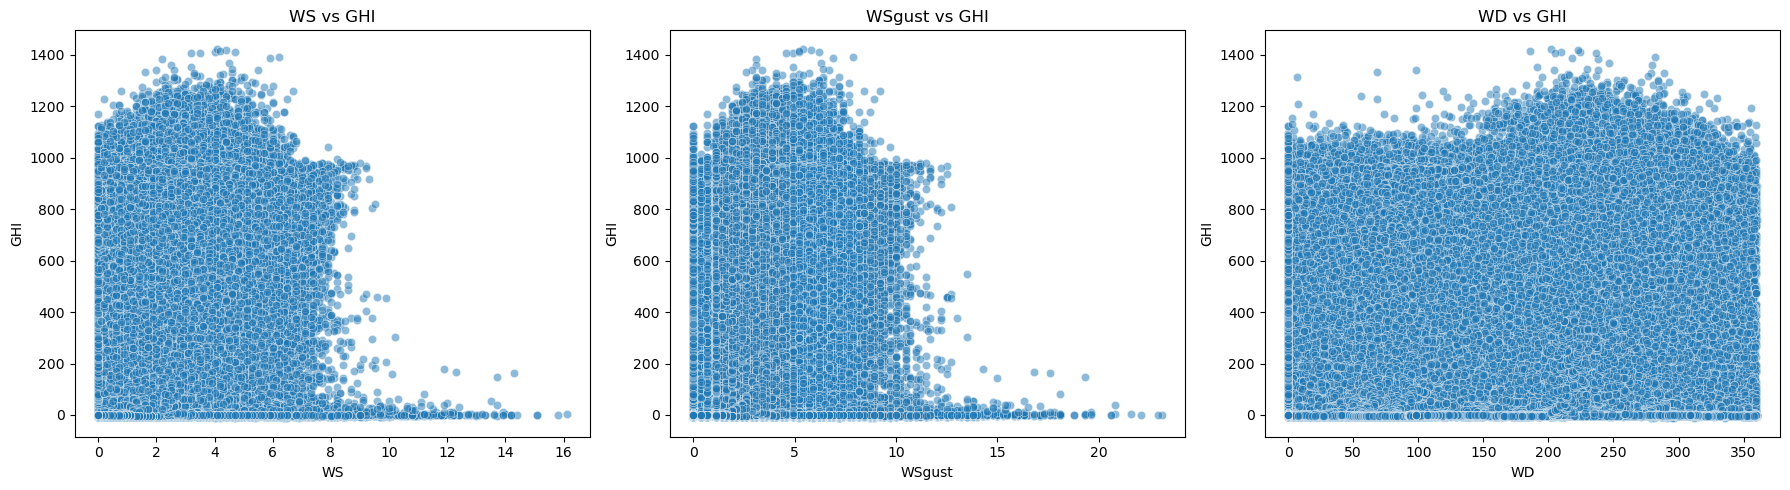

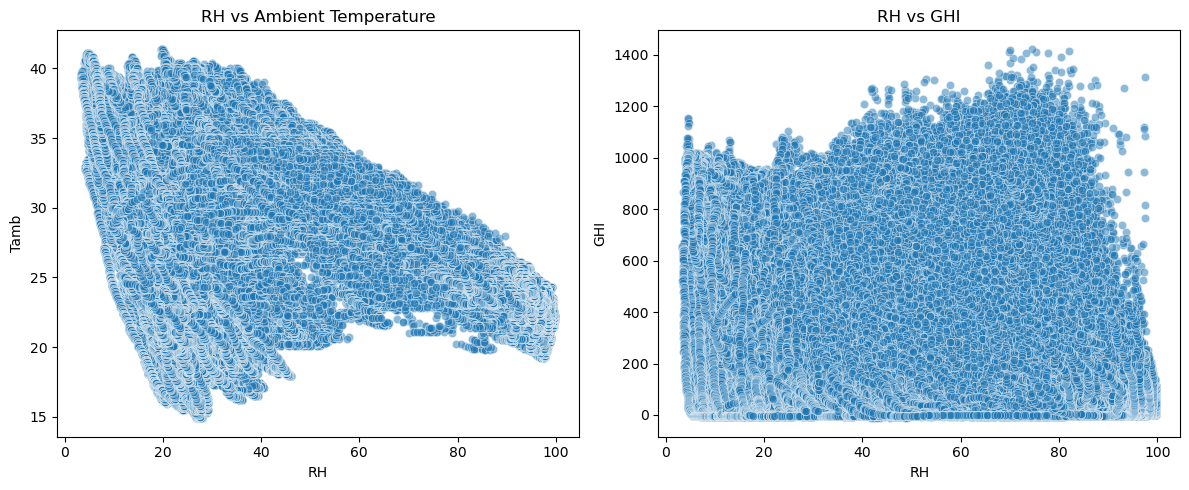

In [18]:
# WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Wind Speed vs GHI
sns.scatterplot(ax=axes[0], data=df, x='WS', y='GHI', alpha=0.5)
axes[0].set_title("WS vs GHI")

# Wind Gust vs GHI
sns.scatterplot(ax=axes[1], data=df, x='WSgust', y='GHI', alpha=0.5)
axes[1].set_title("WSgust vs GHI")

# Wind Direction vs GHI
sns.scatterplot(ax=axes[2], data=df, x='WD', y='GHI', alpha=0.5)
axes[2].set_title("WD vs GHI")

plt.tight_layout()
plt.show()


# RH vs Tamb and RH vs GHI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# RH vs Ambient Temp
sns.scatterplot(ax=ax1, data=df, x='RH', y='Tamb', alpha=0.5)
ax1.set_title("RH vs Ambient Temperature")

# RH vs GHI
sns.scatterplot(ax=ax2, data=df, x='RH', y='GHI', alpha=0.5)
ax2.set_title("RH vs GHI")

plt.tight_layout()
plt.show()

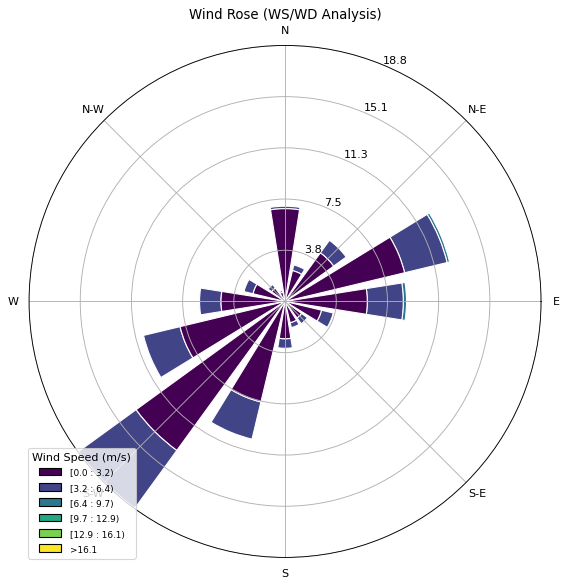

In [19]:
# Wind direction/speed visualization
ax = WindroseAxes.from_ax()
ax.bar(df['WD'].dropna(), df['WS'].dropna(), 
       normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title("Wind Rose (WS/WD Analysis)")
plt.show()

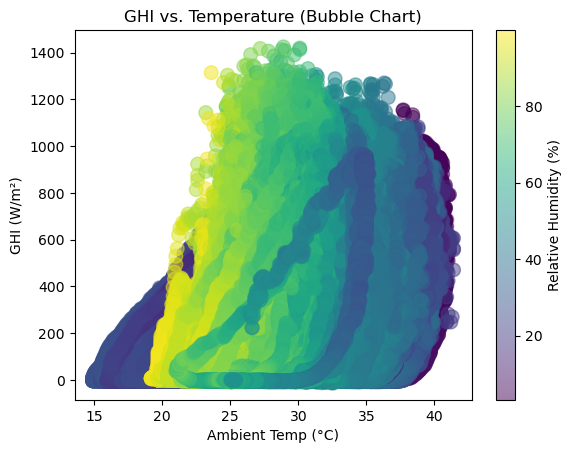

In [20]:
# Bubble chart (GHI vs. Tamb, RH size)
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    c=df['RH'], 
    s=df['BP']/10,  # Size by pressure
    alpha=0.5)
plt.colorbar(label='Relative Humidity (%)')
plt.xlabel('Ambient Temp (°C)')
plt.ylabel('GHI (W/m²)')
plt.title("GHI vs. Temperature (Bubble Chart)")
plt.show()

In [21]:
# Handle missing values (Impute median)
df_clean = df.copy()
for col in ['GHI', 'DNI', 'DHI']:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Export (data/togo_clean.csv)
df_clean.to_csv('C:/Users/user/Desktop/solar-challenge-week1/data/togo_clean.csv')
print("Cleaned data exported to data/togo_clean.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_17396\3840964878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


Cleaned data exported to data/togo_clean.csv
